In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit
from scipy.integrate import quad
from numpy.random import normal
from scipy.stats import chi2, t

In [2]:
n, a, sigma = 120, -4, 4

In [3]:
X = normal(a, sigma, n)
#print(np.mean(X**2) - np.mean(X)*np.mean(X))
print(X)

[-11.09177674  -8.23506092  -3.11199789  -3.8144281   -3.74897715
  -4.37869118  -8.30160079   2.49516393  -2.57085254  -9.05379015
  -5.36399444  -3.90872101   3.67832146   0.68109415  -2.32951038
  -5.25077219  -0.82035089  -3.15416236  -8.70875007  -7.14775863
  -8.55911284   2.53578573  -3.2835675   -1.96895789  -1.81300266
  -6.80056456  -1.92289238 -12.2523194   -9.4964233   -5.13974142
  -5.39468154   1.18691612  -2.10676524 -11.38645164   0.27729826
  -2.79091946  -2.83274143  -6.1958087   -2.58746526  -7.63126436
  -6.15328639   0.43845261  -2.77451601  -9.75368769  -3.10649631
  -7.81627211  -4.28896011  -4.0055419   -7.71571658  -4.9261641
  -5.65911049   0.61119835  -3.59309628   1.26901602  -5.17445693
   1.20717247  -4.29546565   1.68783505   0.72469503  -7.18603135
  -3.28244744  -7.12790441   1.12718328  -3.11328718 -11.04610888
  -2.4749475   -8.70398984  -4.39709188  -1.13745977   0.28148954
   2.23815916   0.19831827 -11.51743077  -1.80644497  -5.94392186
  -2.556472

In [4]:
S2 = 1/(len(X)-1)*np.sum((X-np.mean(X))**2)
df = n - 1
alpha = 1 - 0.9
probs = [alpha/2, 1-alpha/2] 

quantiles = chi2.ppf(probs, df)
print(quantiles)
sigma1 = (S2*(n-1)/quantiles[1])**0.5
sigma2 = (S2*(n-1)/quantiles[0])**0.5
print("Sigma interval:", round(sigma1, 3), round(sigma2, 3))


[ 94.81123694 145.46074022]
Sigma interval: 3.471 4.299


In [5]:
df = n - 1
alpha = 1 - 0.9
probs = [alpha/2, 1-alpha/2] 
mx = np.mean(X)
quantiles = t.ppf(probs, df)
a1 = mx - (S2/n)**0.5*quantiles[1] 
a2 = mx - (S2/n)**0.5*quantiles[0]
print("ME intervals:", round(a1, 3), round(a2, 3))

ME intervals: -4.482 -3.321


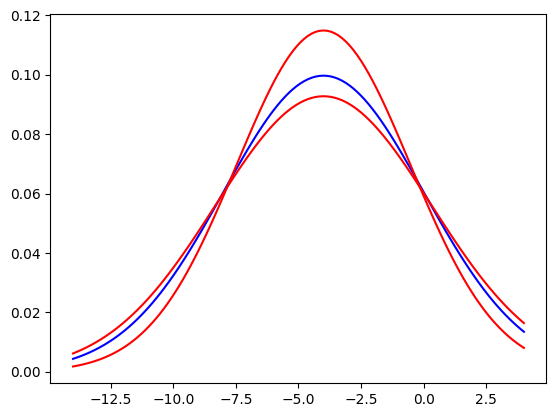

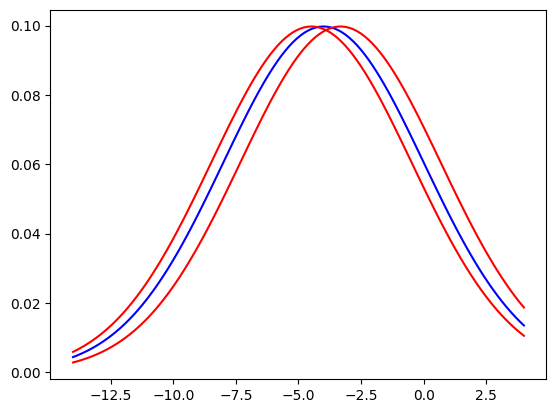

In [6]:
x = np.linspace(-14, 4, 120)
y = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a)**2/(2*sigma**2)) for i in x]
y1 = [1/(2*math.pi)**0.5/sigma1*math.e**(-(i-a)**2/(2*sigma1**2)) for i in x]
y2 = [1/(2*math.pi)**0.5/sigma2*math.e**(-(i-a)**2/(2*sigma2**2)) for i in x]

y11 = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a1)**2/(2*sigma**2)) for i in x]
y22 = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a2)**2/(2*sigma**2)) for i in x]

plt.plot(x, y, color="blue")
plt.plot(x, y1, color="red")
plt.plot(x, y2, color="red")
plt.show()

plt.plot(x, y, color="blue")
plt.plot(x, y11, color="red")
plt.plot(x, y22, color="red")
plt.show()

7


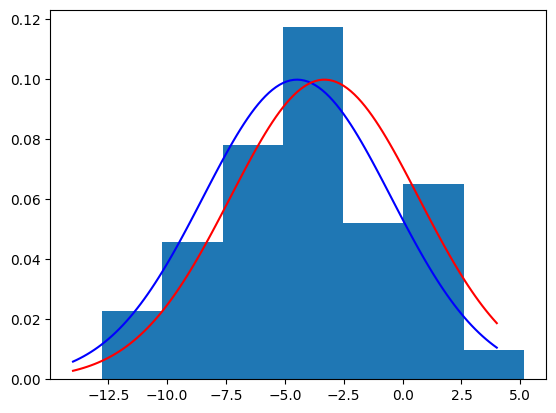

In [7]:
intervals = int(np.log2(n))+1
print(intervals)

plt.hist(X, bins=intervals, density=True)
plt.plot(x, y11, color="blue")
plt.plot(x, y22, color="red")
plt.show()